In [1]:
import pandas as pd
path = "/Users/anthonandersson/Desktop/results-refl-mill.csv"
Colnames = ["parentid","trackid","particle","x","y","z","edep","gtime","ltime","copynr","seed"]
df = pd.read_csv(path,names=Colnames)

,parentid,trackid,particle,x,y,z,edep,gtime,ltime,copynr,seed
0,0,1,neutron,(21.4049,14.9256,-1.64865),0.00000,15966.40,15966.400000,1,58238800.0
1,0,1,neutron,(-0.0629431,26.0000,-3.65552),0.00000,9405.59,9405.590000,3,32067200.0
2,0,1,neutron,(22.8106,11.9382,2.76135),0.00899,18715.80,18715.800000,1,77457200.0
3,0,1,neutron,(22.8602,12.4049,3.1749),0.00000,19037.00,19037.000000,1,77457200.0
4,3,90,opticalphoton,(9.48324,-23.0800,2.22019),0.00000,1691.71,0.893061,10,36228500.0


In [3]:
df['trackid'].nunique()

7912

In [4]:
df['seed'].nunique()


1078

In [5]:
df['trackid'].count()

17078952

In [30]:
import numpy as np
import pickle
with open('clean_dict.pkl', 'rb') as file:
    gtime_dict = pickle.load(file)

#
selected_seed = [1184370.0]  
#custom bins
#custom_bins = np.arange(1,12,1)
#selected_seed = list(gtime_dict.keys())
##print("hey")
# Select 'gtime' values for the chosen seed number
##for seed in selected_seed:
for seed in selected_seed:
    gtime_values1 = gtime_dict.get(seed, [])
    minimum = min(gtime_values1) - 50
    maximum = min(gtime_values1) + 50
    filtered_gtime_values1 = [value for value in gtime_values1 if minimum <= value <= maximum]
    min_value = min(filtered_gtime_values1)
    adjusted_gtime_values1 = np.array(filtered_gtime_values1) - min_value
    count, division = np.histogram(adjusted_gtime_values1,bins=200)
    print(count,division)
        
# Create a histogram for the 'gtime' values
#plt.hist(filtered_gtime_values, bins= 100, edgecolor='black')
#plt.xlabel('gtime')
#plt.ylabel('Frequency')
#plt.title(f'Histogram of gtime Values for Seed Number {selected_seed}')


[ 20  41  63 102 118 123 144 144 176 209 181 149 191 169 207 170 171 164
 162 144 137 123  76 116 113 118  99 113 103 114  64 102  78  54  82  65
  63  73  61  67  53  49  49  51  30  43  50  39  39  41  34  33  34  38
  28  21  31  31  30  28  24  17  13  23  24  18  14  26  12  12  10  14
  10  17  12  15  10   9   9  14  10  13   7   5  14   8   7   1   3   9
   6   8   1   2   2   7   4   7   7   1   7   7   1   3   5   5   5   3
   4   2   5   4   2   3   1   3   0   2   2   3   1   2   0   3   2   0
   0   1   3   0   0   1   1   0   1   1   2   0   1   1   2   1   1   1
   0   1   4   4   1   0   1   0   0   0   1   0   0   1   1   0   0   1
   0   0   0   0   1   0   0   1   1   0   0   0   0   0   0   1   0   0
   0   0   1   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
   0   1] [0.     0.0291 0.0582 0.0873 0.1164 0.1455 0.1746 0.2037 0.2328 0.2619
 0.291  0.3201 0.3492 0.3783 0.4074 0.4365 0.4656 0.4947 0.5238 0.5529
 0.582  0.6111 0.6402 0.6693 0.6984 0.7275 0.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cProfile

def profiled_function():
    with open('clean_dict.pkl', 'rb') as file:
        clean_dict = pickle.load(file)

    s_seed = list(clean_dict.keys())
    selected_seed = [value for value in s_seed if isinstance(value, (int, float))]

# Select 'gtime' values for the chosen seed number
    data = [] 
    for seed in selected_seed:
        gtime_values1 = clean_dict.get(seed, [])
        minimum = min(gtime_values1) - 50
        maximum = min(gtime_values1) + 50
        filtered_gtime_values1 = [value for value in gtime_values1 if minimum <= value <= maximum]
        min_value = min(filtered_gtime_values1)
        adjusted_gtime_values1 = np.array(filtered_gtime_values1) - min_value
        count, division = np.histogram(adjusted_gtime_values1,bins=200)
    
  
    # Calculate the 10% threshold value
        threshold = 0.1 * max(count)
    
    # Find the index where count reaches 10% and where it drops to 10% again
        start_idx = np.argmax(count >= threshold)
        end_idx = len(count) - np.argmax(count[::-1] >= threshold) - 1
    
    # Calculate the corresponding time values using the division array
        start_time = division[start_idx]
        end_time = division[end_idx]
    
    # Calculate amplitude, pulse width, and area under the curve
        amplitude = max(count)
        pulse_width = end_time - start_time
        pulse_count = sum(count[start_idx:end_idx])
    
    # Calculate time for maximum amplitude using the index of max count
        max_amplitude_idx = np.argmax(count)
        time_for_max_amplitude = division[max_amplitude_idx]
    
        data.append({
        'Seed': seed,
        'Amplitude': amplitude,
        'TimeForMaxAmplitude': time_for_max_amplitude,
        'PulseWidth': pulse_width,
        'PulseCount': pulse_count   
        })
        # Plot histograms in a 2x2 grid
   # Plot histograms in a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot pulse width histogram
    axes[0, 0].hist([entry['PulseWidth'] for entry in data], bins=50, edgecolor='black')
    axes[0, 0].set_xlabel('Pulse Width (ns)')
    axes[0, 0].set_ylabel('Frequency')

# Plot time for max amplitude histogram
    axes[0, 1].hist([entry['TimeForMaxAmplitude'] for entry in data], bins=50, edgecolor='black')
    axes[0, 1].set_xlabel('Time for Max Amplitude (ns)')
    axes[0, 1].set_ylabel('Frequency')

# Plot pulse count histogram
    axes[1, 0].hist([entry['PulseCount'] for entry in data], bins=50, edgecolor='black')
    axes[1, 0].set_xlabel('Photon count during pulse')
    axes[1, 0].set_ylabel('Frequency')

# Plot amplitude histogram
    axes[1, 1].hist([entry['Amplitude'] for entry in data], bins=50, edgecolor='black')
    axes[1, 1].set_xlabel('Amplitude')
    axes[1, 1].set_ylabel('Frequency')

# Adjust layout
    plt.tight_layout()
    plt.show()
# Create a DataFrame from the collected data
    #result_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
   # result_df.to_csv('complete_analysis-wPC.csv', index=False)

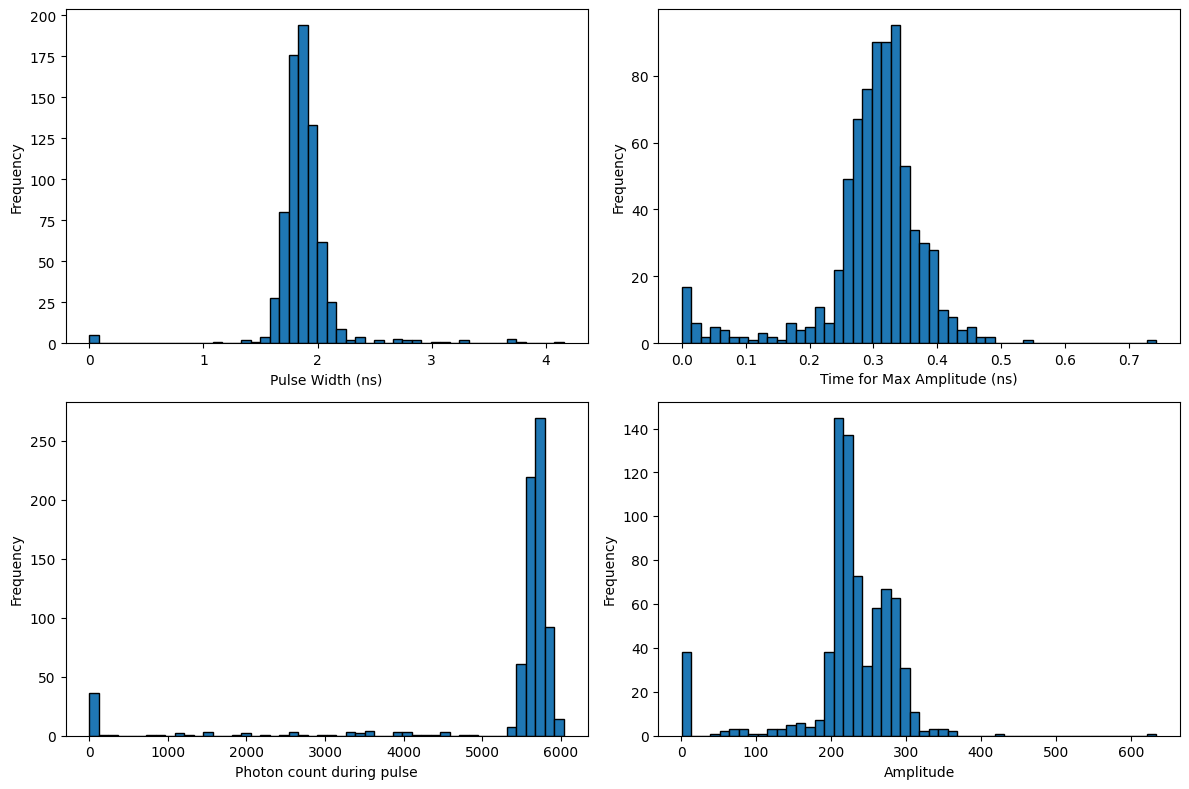

In [6]:
profiled_function()

In [35]:
import numpy as np
import pandas as pd
import pickle
import cProfile

#def profiled_function1():
with open('clean_dict.pkl', 'rb') as file:
    clean_dict = pickle.load(file)

s_seed = list(clean_dict.keys())
selected_seed = [value for value in s_seed if isinstance(value, (int, float))]
    #selected_seed = [75221100.0, 25816500.0, 26988700.0,28867300.0,30088900.0,31784500.0] 
#bins = np.arange(1,101,1)
##print("hey")
# Select 'gtime' values for the chosen seed number
##for seed in selected_seed:
data = [] 
for seed in selected_seed:
    gtime_values1 = clean_dict.get(seed, [])
    minimum = min(gtime_values1) - 50
    maximum = min(gtime_values1) + 50
    filtered_gtime_values1 = [value for value in gtime_values1 if minimum <= value <= maximum]
    min_value = min(filtered_gtime_values1)
    adjusted_gtime_values1 = np.array(filtered_gtime_values1) - min_value
    count, division = np.histogram(adjusted_gtime_values1,bins=200)
    
  
    # Calculate the 10% threshold value
    threshold = 0.1 * max(count)
    
    # Find the index where count reaches 10% and where it drops to 10% again
    start_idx = np.argmax(count >= threshold)
    end_idx = len(count) - np.argmax(count[::-1] >= threshold) - 1
    
    # Calculate the corresponding time values using the division array
    start_time = division[start_idx]
    end_time = division[end_idx]
    
    # Calculate amplitude, pulse width, and area under the curve
    amplitude = max(count)
    pulse_width = end_time - start_time
    area_under_curve = np.trapz(count, dx=(division[1] - division[0]))
    
    # Calculate time for maximum amplitude using the index of max count
    max_amplitude_idx = np.argmax(count)
    time_for_max_amplitude = division[max_amplitude_idx]
    
    data.append({
    'Seed': seed,
    'Amplitude': amplitude,
    'TimeForMaxAmplitude': time_for_max_amplitude,
    'PulseWidth': pulse_width,
    'AreaUnderCurve': area_under_curve   
    })

# Create a DataFrame from the collected data
    result_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
    result_df.to_csv('complete_analysis.csv', index=False)
